In [1]:
# Importing our Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Adding in our DataSets
all_ages_data = "C:\\Users\\Jordr\\OneDrive\\Desktop\\Data Work\\CollegeMajorAnalysis\\all-ages.csv"
majors_list_data = "C:\\Users\\Jordr\\OneDrive\\Desktop\\Data Work\\CollegeMajorAnalysis\\majors-list.csv"
women_stem_data = "C:\\Users\\Jordr\\OneDrive\\Desktop\\Data Work\\CollegeMajorAnalysis\\women-stem.csv"

In [2]:
# Starting with Cleaning all_ages_data
all_ages = pd.read_csv(all_ages_data)
all_ages_df = pd.DataFrame(all_ages)
all_ages_df = all_ages_df.dropna()

In [3]:
all_ages_df

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
...,...,...,...,...,...,...,...,...,...,...,...
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0


In [4]:
#Removing the Majors Columns
all_ages_df.drop('Major', axis=1, inplace=True)


In [5]:
all_ages_df

,Major_code,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
...,...,...,...,...,...,...,...,...,...,...
168,6211,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0


In [6]:
#Grouping our targets together for easier analysis
all_ages_grouped = all_ages_df.groupby('Major_category').agg({
    'Total': 'mean',
    'Employed': 'sum',
    'Unemployed': 'sum',
    
})
all_ages_grouped[['Total', 'Employed', 'Unemployed']] = all_ages_grouped[['Total', 'Employed', 'Unemployed']].round()

all_ages_grouped

,Total,Employed,Unemployed
Major_category,,,
Agriculture & Natural Resources,63244.0,480415,18551
Arts,225733.0,1308695,104125
Biology & Life Science,95585.0,947058,57335
Business,758365.0,7529851,434397
Communications & Journalism,450956.0,1423041,101199
Computers & Mathematics,161943.0,1410607,79974
Education,293757.0,2833199,125336
Engineering,123311.0,2621966,146389
Health,245905.0,2192692,75013


In [7]:
# Creating a CSV of our Grouped all_ages dataframe
all_ages_grouped.to_csv('all_ages_grouped.csv', index=False)

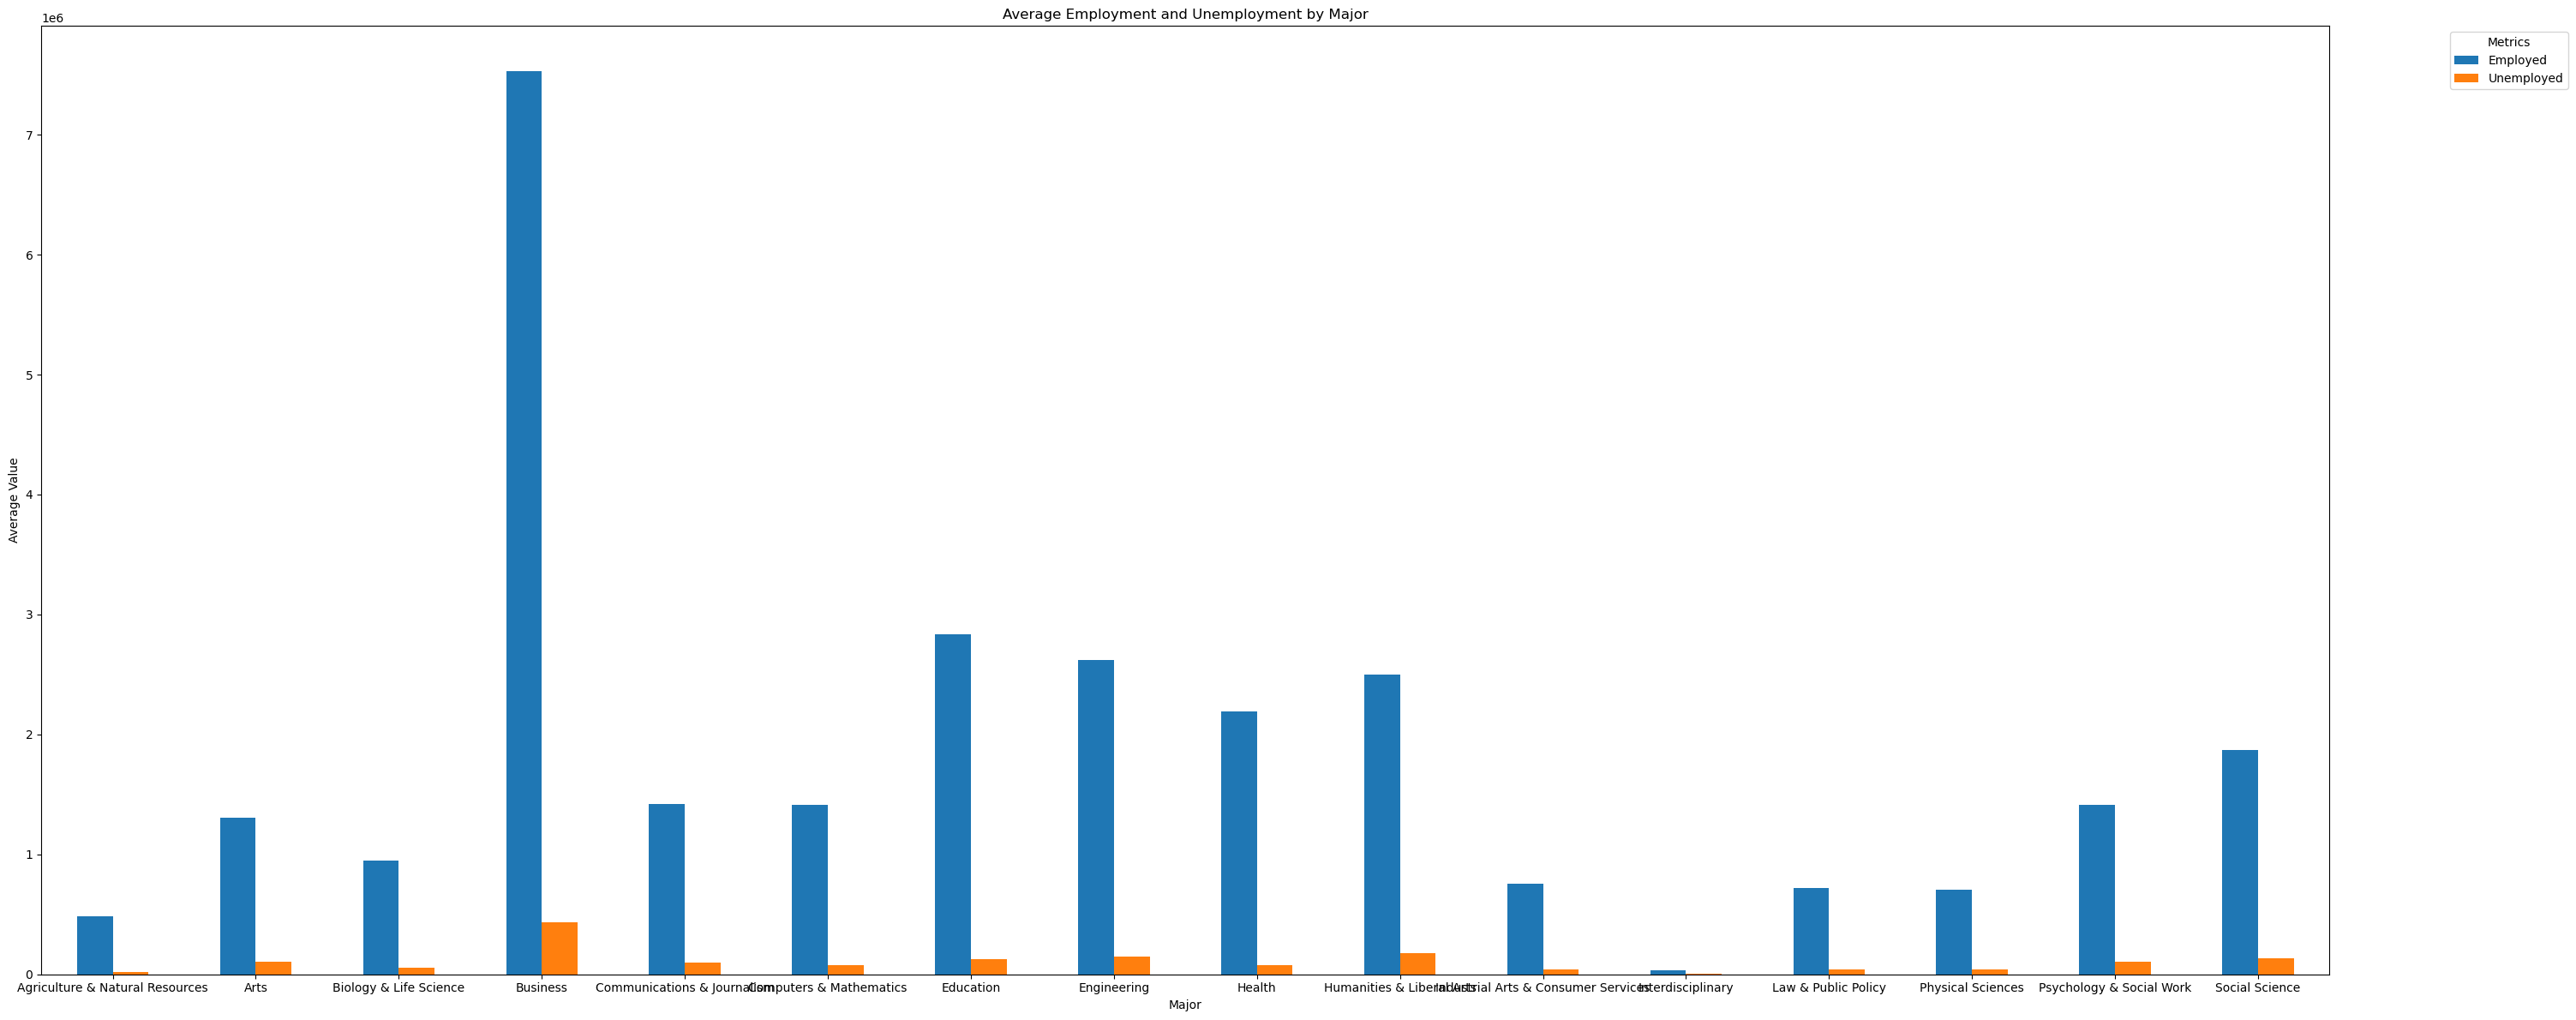

In [8]:
# Plotting a Bar Graph
all_ages_grouped[['Employed', 'Unemployed']].plot(kind='bar', figsize=(30, 12))

# Adding labels and title
plt.title('Average Employment and Unemployment by Major')
plt.xlabel('Major')
plt.ylabel('Average Value')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Installing Plotly to add Interactive features
!pip install plotly

In [10]:
print(all_ages_grouped.columns)

Index(['Total', 'Employed', 'Unemployed'], dtype='object')


In [11]:
# Importing new dependencies
import plotly.graph_objects as go
from IPython.display import HTML
import json

# Create pie charts for each column
for column in ['Employed', 'Unemployed', 'Total']:
    fig = go.Figure(data=[go.Pie(
        labels=all_ages_grouped.index,
        values=all_ages_grouped[column],
        hovertemplate="Category %{label}<br>" + 
                      f"{column}: %{{value:,.0f}}<br>" +
                      "Percentage: %{percent}<extra></extra>"
    )])
    
    fig.update_layout(
        title=f"Distribution of {column} by Category",
        width=800,
        height=600
    )
    
    # Save each plot as HTML with UTF-8 encoding
    html_content = fig.to_html(full_html=False)
    with open(f'pie_chart_{column.lower()}.html', 'w', encoding='utf-8') as f:
        f.write(html_content)


print("Interactive pie charts have been created and saved successfully.")

Interactive pie charts have been created and saved successfully.


In [12]:
all_ages_df

,Major_code,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
...,...,...,...,...,...,...,...,...,...,...
168,6211,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0


In [13]:
# Grouping together our Salaries 
ages_salary_grouped = all_ages_df.groupby('Major_category').agg({
    'Median': 'mean',
    'P25th': 'mean',
    'P75th': 'mean',
    
})
#Rounding our results
ages_salary_grouped[['Median', 'P25th', 'P75th']] = ages_salary_grouped[['Median', 'P25th', 'P75th']].round()
ages_salary_grouped


,Median,P25th,P75th
Major_category,,,
Agriculture & Natural Resources,55000.0,36550.0,81300.0
Arts,43525.0,29112.0,64500.0
Biology & Life Science,50821.0,33214.0,78771.0
Business,60615.0,41854.0,91462.0
Communications & Journalism,49500.0,34000.0,76250.0
Computers & Mathematics,66273.0,43427.0,95818.0
Education,43831.0,33222.0,58456.0
Engineering,77759.0,52459.0,108534.0
Health,56458.0,40067.0,77500.0


In [14]:
ages_salary_grouped.to_csv('ages_salary_grouped.csv', index=False)

In [15]:
from plotly.subplots import make_subplots

#Create a Histogram to outline our Salary Distributions
# Create subplots
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('Median Salary Distribution',
                                  '25th Percentile Salary Distribution',
                                  '75th Percentile Salary Distribution'),
                    vertical_spacing=0.12)

# Function to add histogram with text labels
def add_histogram_with_labels(data, names, row):
    # Add histogram
    fig.add_trace(
        go.Histogram(
            x=data,
            name='Salary',
            xbins=dict(size=5000),  # Adjust bin size for better visualization
            hovertemplate="Salary Range: %{x:$,.0f}<br>Count: %{y}<br>Major Categories: %{text}<extra></extra>",
            text=names
        ),
        row=row, col=1
    )
    
# Add histograms with labels
add_histogram_with_labels(ages_salary_grouped['Median'], ages_salary_grouped.index, 1)
add_histogram_with_labels(ages_salary_grouped['P25th'], ages_salary_grouped.index, 2)
add_histogram_with_labels(ages_salary_grouped['P75th'], ages_salary_grouped.index, 3)

# Update layout
fig.update_layout(
    height=1200,  # Increased height for better readability
    width=1200,   # Increased width for better readability
    showlegend=False,
    title_text="Salary Distributions by Major Category",
    bargap=0.1    # Add gap between bars
)

# Update axes
for i in range(1, 4):
    fig.update_xaxes(title_text="Salary ($)", row=i, col=1)
    fig.update_yaxes(title_text="Count", row=i, col=1)

# Save the interactive plot
with open('salary_distributions_labeled.html', 'w', encoding='utf-8') as f:
    f.write(fig.to_html(full_html=False))


In [16]:
# Starting with Cleaning women_stem_data
women_stem = pd.read_csv(women_stem_data)
women_stem_df = pd.DataFrame(women_stem)
women_stem_df = women_stem_df.dropna()


In [17]:
women_stem_df

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000


In [18]:
#Removing the Majors and Major Code Columns
women_stem_df.drop('Major', axis=1, inplace=True)
women_stem_df.drop('Major_code', axis=1, inplace=True)
women_stem_df

,Rank,Major_category,Total,Men,Women,ShareWomen,Median
0,1,Engineering,2339,2057,282,0.120564,110000
1,2,Engineering,756,679,77,0.101852,75000
2,3,Engineering,856,725,131,0.153037,73000
3,4,Engineering,1258,1123,135,0.107313,70000
4,5,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...
71,72,Biology & Life Science,9154,3878,5276,0.576360,33000
72,73,Health,48491,13487,35004,0.721866,33000
73,74,Health,33599,7574,26025,0.774577,32400
74,75,Health,38279,1225,37054,0.967998,28000


In [19]:
# Convert 'ShareWomen' from decimals to percentages
women_stem_df['ShareWomen'] = women_stem_df['ShareWomen'] * 100

# Round the variables for readability
women_stem_df['ShareWomen'] = women_stem_df['ShareWomen'].round(2)

In [20]:
women_stem_df

,Rank,Major_category,Total,Men,Women,ShareWomen,Median
0,1,Engineering,2339,2057,282,12.06,110000
1,2,Engineering,756,679,77,10.19,75000
2,3,Engineering,856,725,131,15.30,73000
3,4,Engineering,1258,1123,135,10.73,70000
4,5,Engineering,2573,2200,373,14.50,65000
...,...,...,...,...,...,...,...
71,72,Biology & Life Science,9154,3878,5276,57.64,33000
72,73,Health,48491,13487,35004,72.19,33000
73,74,Health,33599,7574,26025,77.46,32400
74,75,Health,38279,1225,37054,96.80,28000


In [23]:
# Rename the column 'ShareWomen' to '%in_field'
# Rename the column '%in_field' to 'Percent_women_in_field'
#Percent_Women_in_field is the percentage of women in the field
women_stem_df.rename(columns={'ShareWomen': 'Percent_Women_in_field'}, inplace=True)
women_stem_df

,Rank,Major_category,Total,Men,Women,Percent_Women_in_field,Median
0,1,Engineering,2339,2057,282,12.06,110000
1,2,Engineering,756,679,77,10.19,75000
2,3,Engineering,856,725,131,15.30,73000
3,4,Engineering,1258,1123,135,10.73,70000
4,5,Engineering,2573,2200,373,14.50,65000
...,...,...,...,...,...,...,...
71,72,Biology & Life Science,9154,3878,5276,57.64,33000
72,73,Health,48491,13487,35004,72.19,33000
73,74,Health,33599,7574,26025,77.46,32400
74,75,Health,38279,1225,37054,96.80,28000


In [25]:
# Grouping together our Salaries 
women_stem_grouped = women_stem_df.groupby('Major_category').agg({
    'Total': 'sum',
    'Men': 'sum',
    'Women': 'sum',
    'Percent_Women_in_field': 'mean',
    'Median': 'mean'
    
})
#Rounding our results
women_stem_grouped[['Total', 'Men', 'Women', 'Percent_Women_in_field', 'Median']] = women_stem_grouped[['Total', 'Men', 'Women', 'Percent_Women_in_field', 'Median']].round()
women_stem_grouped

,Total,Men,Women,Percent_Women_in_field,Median
Major_category,,,,,
Biology & Life Science,453862,184919,268943,59.0,36421.0
Computers & Mathematics,299008,208725,90283,31.0,42745.0
Engineering,537583,408307,129276,24.0,57383.0
Health,463230,75517,387713,80.0,36825.0
Physical Sciences,185479,95390,90089,51.0,41890.0


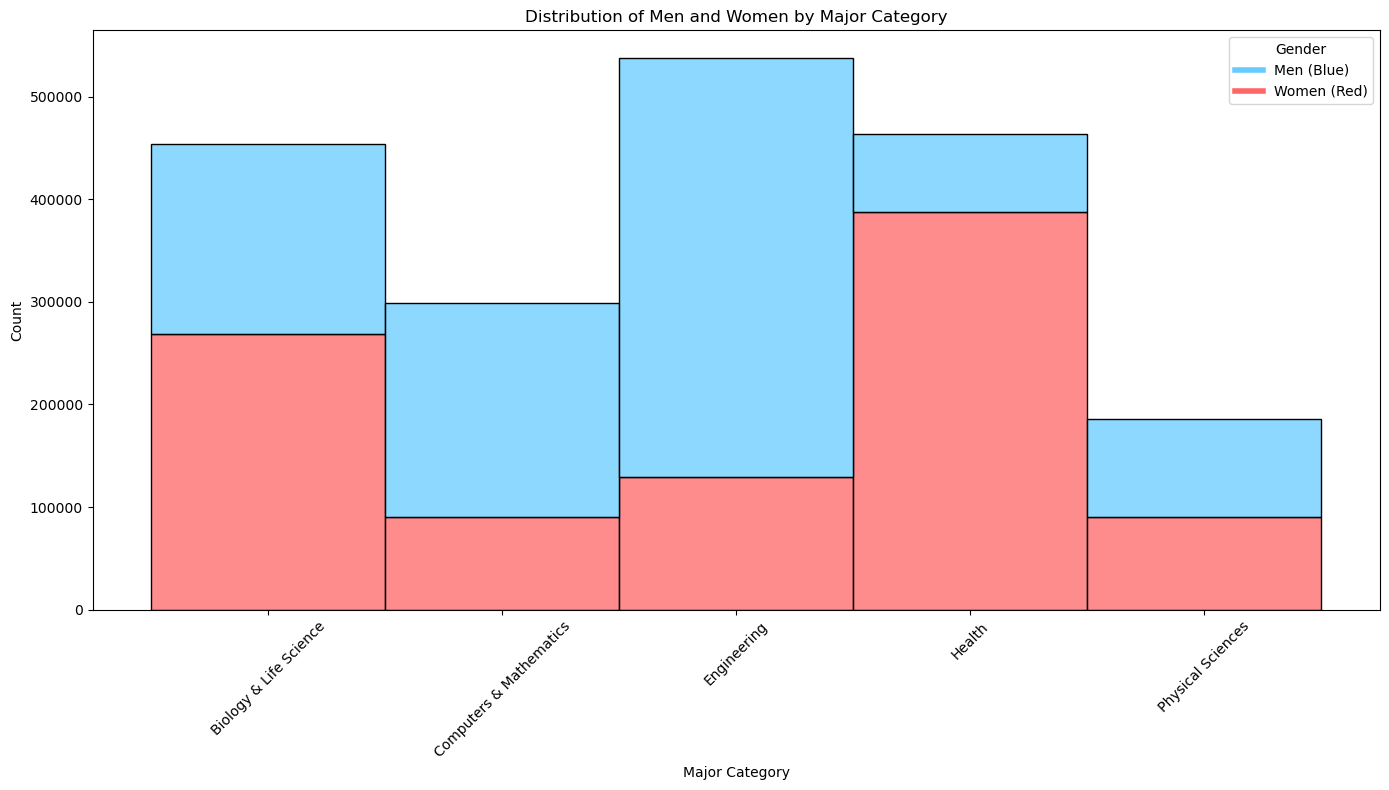

<Figure size 640x480 with 0 Axes>

In [33]:
import seaborn as sns

# Reset the index to convert Major_category from index to a column
women_stem_grouped_reset = women_stem_grouped.reset_index()

# Melt the DataFrame to have a long format suitable for seaborn
women_stem_melted = women_stem_grouped_reset.melt(id_vars='Major_category', 
                                                   value_vars=['Men', 'Women'], 
                                                   var_name='Gender', 
                                                   value_name='Count')

# Create the histogram with specified colors
plt.figure(figsize=(14, 8))
sns.histplot(data=women_stem_melted, x='Major_category', weights='Count', hue='Gender', 
             multiple='stack', bins=len(women_stem_grouped_reset), 
             palette={'Men': '#66ccff', 'Women': '#ff6666'})  # Specify colors for each gender

# Set labels and title
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.title('Distribution of Men and Women by Major Category')
plt.xticks(rotation=45)
# Create a custom legend
handles = [plt.Line2D([0], [0], color='#66ccff', lw=4, label='Men (Blue)'),
           plt.Line2D([0], [0], color='#ff6666', lw=4, label='Women (Red)')]
plt.legend(handles=handles, title='Gender', loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()


In [29]:
women_stem_grouped.describe()

,Total,Men,Women,Percent_Women_in_field,Median
count,5.000000,5.000000,5.00000,5.000000,5.000000
mean,387832.400000,194571.600000,193260.80000,49.000000,43052.800000
std,142571.579294,132275.564818,131227.24157,22.438806,8508.345033
min,185479.000000,75517.000000,90089.00000,24.000000,36421.000000
25%,299008.000000,95390.000000,90283.00000,31.000000,36825.000000
50%,453862.000000,184919.000000,129276.00000,51.000000,41890.000000
75%,463230.000000,208725.000000,268943.00000,59.000000,42745.000000
max,537583.000000,408307.000000,387713.00000,80.000000,57383.000000
